# Comprehensive Metabolomics of ME/CFS

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
data = pd.read_csv("data_matrix-table 1.csv", sep=";", escapechar = '.', decimal = ',', index_col = 'compound_id')
data.head()

,sample_0001,sample_0002,sample_0003,sample_0004,sample_0005,sample_0006,sample_0007,sample_0008,sample_0009,sample_0010,...,sample_0043,sample_0044,sample_0045,sample_0046,sample_0047,sample_0048,sample_0049,sample_0050,sample_0051,sample_0052
compound_id,,,,,,,,,,,,,,,,,,,,,
compound_0001,672039.0,599392.0,1023576.0,804353.0,557954.0,1609237.0,927166.0,1088624.0,707863.0,799685.0,...,1216151.0,662043.0,935385.0,813732.0,576076.0,1014031.0,678012.0,385437.0,1019252.0,434933.0
compound_0002,74472.0,23403.0,33924.0,15061.0,40816.0,15061.0,15061.0,26107.0,82198.0,30903.0,...,27049.0,15061.0,62109.0,42156.0,21103.0,43291.0,26561.0,15061.0,72704.0,39783.0
compound_0003,54758.0,22374.0,57498.0,21318.0,58013.0,23417.0,21318.0,34094.0,53840.0,24596.0,...,21318.0,23948.0,41830.0,87383.0,26378.0,74266.0,38397.0,21318.0,68930.0,26156.0
compound_0004,230130.0,112937.0,256586.0,62260.0,193937.0,53626.0,67179.0,105097.0,152781.0,153281.0,...,118678.0,89233.0,152517.0,74130.0,200452.0,228867.0,113867.0,29731.0,283890.0,90141.0
compound_0005,128065.0,66968.0,92744.0,29284.0,100637.0,44635.0,23037.0,93367.0,132301.0,75821.0,...,57250.0,42497.0,113116.0,98979.0,85391.0,132303.0,90500.0,23037.0,132772.0,66803.0


In [3]:
data = data.transpose()
data.head()

compound_id,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1781,compound_1782,compound_1783,compound_1784,compound_1785,compound_1786,compound_1787,compound_1788,compound_1789,compound_1790
sample_0001,672039.0,74472.0,54758.0,230130.0,128065.0,1595220.0,1563524.0,306946.0,2139132.0,191212.0,...,4.2410,2.9821,202.3064,6.3900,9.4495,2368.6685,174.0733,40.5750,484.9198,1771.8030
sample_0002,599392.0,23403.0,22374.0,112937.0,66968.0,911738.0,1761776.0,170567.0,1680606.0,245996.0,...,2.5322,2.9967,179.9669,5.8186,8.0212,1638.8876,148.6103,27.8358,333.8163,980.4756
sample_0003,1023576.0,33924.0,57498.0,256586.0,92744.0,1242042.0,1495843.0,180168.0,1757116.0,208971.0,...,4.2848,3.3440,168.2757,5.5424,7.1869,1716.4484,134.0830,28.4095,393.9803,418.6395
sample_0004,804353.0,15061.0,21318.0,62260.0,29284.0,1594599.0,1359280.0,219187.0,1655573.0,129250.0,...,5.5764,4.3642,184.8738,5.8394,8.1066,1925.0035,152.0123,26.4876,495.5018,738.0438
sample_0005,557954.0,40816.0,58013.0,193937.0,100637.0,994207.0,3893889.0,307190.0,1845230.0,116337.0,...,2.2900,2.3488,110.1221,4.2770,7.0231,1336.6816,95.3169,16.4406,322.3633,586.9093


In [4]:
data.describe()

compound_id,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1781,compound_1782,compound_1783,compound_1784,compound_1785,compound_1786,compound_1787,compound_1788,compound_1789,compound_1790
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,9.039227e+05,32339.057692,39250.615385,145139.134615,77730.384615,1.296888e+06,3.641979e+06,285558.576923,1.761902e+06,155856.692308,...,3.466821,2.931929,154.183117,5.472023,10.016440,1684.275827,137.594185,26.452858,369.187325,756.100358
std,3.041032e+05,23464.336263,21927.963456,85653.316900,38276.562471,4.647482e+05,4.205837e+06,118081.318091,7.144546e+05,110733.303262,...,0.917163,0.677942,40.577034,1.864279,5.407366,422.272611,49.051842,8.453101,83.420511,456.306565
min,3.854370e+05,15061.000000,21318.000000,28964.000000,23037.000000,6.484610e+05,1.484940e+05,97803.000000,5.628200e+05,40151.000000,...,1.623100,1.644300,58.887500,1.647200,6.164200,638.450400,30.357200,7.449700,173.080400,180.003000
25%,6.765188e+05,15061.000000,21318.000000,89914.000000,45793.750000,9.924350e+05,9.533482e+05,183987.000000,1.356778e+06,47712.500000,...,2.856175,2.508975,130.283825,4.222525,7.326725,1435.102150,100.797050,20.058950,322.064500,454.159450
50%,8.507225e+05,24507.500000,28442.500000,120581.500000,68880.500000,1.184570e+06,2.091264e+06,267389.000000,1.682288e+06,128203.500000,...,3.483950,2.970050,153.612450,5.450450,8.160200,1668.981050,139.337150,26.259500,355.140550,617.437550
75%,1.069312e+06,40041.250000,52346.750000,192340.250000,99393.500000,1.498860e+06,4.545380e+06,381386.250000,2.001750e+06,234940.000000,...,4.070775,3.392000,180.316425,6.382425,9.428950,1972.751400,172.231675,30.985075,414.803475,946.654175
max,1.638999e+06,115460.000000,101484.000000,441043.000000,185999.000000,3.232083e+06,2.553039e+07,531111.000000,4.109919e+06,515996.000000,...,5.576400,4.901000,267.986000,9.689500,30.218100,2513.449200,239.921100,48.369800,565.346800,2016.189900


In [5]:
data_labels = pd.read_csv('sample_metadata-Table 1.csv', sep=";", escapechar = '.',thousands = ',', index_col = 'sample_id')
data_labels.head()

,health_status,sample_id_internal,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
sample_id,,,,,,,,,,,,,,,,
sample_0001,case,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sample_0002,case,C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sample_0003,case,C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sample_0004,case,C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sample_0005,case,C5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_labels.columns

Index(['health_status', 'sample_id_internal', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [7]:
data_labels = data_labels.drop(columns =['Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, sample_0001 to sample_0052
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   health_status       52 non-null     object
 1   sample_id_internal  52 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [8]:
data_labels = pd.get_dummies(data_labels, columns=['health_status'], dtype = float)
data_labels.head()

,sample_id_internal,health_status_case,health_status_control
sample_id,,,
sample_0001,C1,1.0,0.0
sample_0002,C2,1.0,0.0
sample_0003,C3,1.0,0.0
sample_0004,C4,1.0,0.0
sample_0005,C5,1.0,0.0


In [9]:
data_full = pd.concat([data,data_labels['health_status_case']], axis = 1)
data_full.head()

,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1782,compound_1783,compound_1784,compound_1785,compound_1786,compound_1787,compound_1788,compound_1789,compound_1790,health_status_case
sample_0001,672039.0,74472.0,54758.0,230130.0,128065.0,1595220.0,1563524.0,306946.0,2139132.0,191212.0,...,2.9821,202.3064,6.3900,9.4495,2368.6685,174.0733,40.5750,484.9198,1771.8030,1.0
sample_0002,599392.0,23403.0,22374.0,112937.0,66968.0,911738.0,1761776.0,170567.0,1680606.0,245996.0,...,2.9967,179.9669,5.8186,8.0212,1638.8876,148.6103,27.8358,333.8163,980.4756,1.0
sample_0003,1023576.0,33924.0,57498.0,256586.0,92744.0,1242042.0,1495843.0,180168.0,1757116.0,208971.0,...,3.3440,168.2757,5.5424,7.1869,1716.4484,134.0830,28.4095,393.9803,418.6395,1.0
sample_0004,804353.0,15061.0,21318.0,62260.0,29284.0,1594599.0,1359280.0,219187.0,1655573.0,129250.0,...,4.3642,184.8738,5.8394,8.1066,1925.0035,152.0123,26.4876,495.5018,738.0438,1.0
sample_0005,557954.0,40816.0,58013.0,193937.0,100637.0,994207.0,3893889.0,307190.0,1845230.0,116337.0,...,2.3488,110.1221,4.2770,7.0231,1336.6816,95.3169,16.4406,322.3633,586.9093,1.0


In [10]:
data_full.tail()

,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1782,compound_1783,compound_1784,compound_1785,compound_1786,compound_1787,compound_1788,compound_1789,compound_1790,health_status_case
sample_0048,1014031.0,43291.0,74266.0,228867.0,132303.0,1497081.0,2008853.0,435096.0,1844785.0,284632.0,...,3.7913,172.9869,6.2761,7.2179,2009.8961,184.8696,29.7098,537.0563,766.5373,0.0
sample_0049,678012.0,26561.0,38397.0,113867.0,90500.0,2387276.0,8871935.0,337506.0,3609518.0,40151.0,...,2.9640,133.2139,3.1823,6.4743,1453.6886,117.0809,19.8986,384.7017,646.5598,0.0
sample_0050,385437.0,15061.0,21318.0,29731.0,23037.0,956490.0,5771395.0,129100.0,918962.0,80370.0,...,2.5585,120.9511,3.6443,8.1645,948.5136,48.4216,15.0524,252.0705,263.5224,0.0
sample_0051,1019252.0,72704.0,68930.0,283890.0,132772.0,1623758.0,9805331.0,327770.0,2754873.0,72560.0,...,1.8508,164.4916,7.8184,7.3316,1870.4915,239.9211,34.7575,352.4500,2016.1899,0.0
sample_0052,434933.0,39783.0,26156.0,90141.0,66803.0,1027606.0,472887.0,199756.0,1103439.0,515996.0,...,3.7229,153.2060,4.8656,7.8141,1813.6272,166.1732,28.2014,431.4605,527.2179,0.0


In [11]:
data_full.convert_dtypes()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, sample_0001 to sample_0052
Columns: 1791 entries, compound_0001 to health_status_case
dtypes: float64(1791)
memory usage: 730.1+ KB


In [12]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from sklearn.model_selection import train_test_split


In [13]:
X = data_full.iloc[:, :-1]
y = data_full.iloc[:, -1]

In [14]:
data_train, data_test, label_train, label_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [15]:
data_test

,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1781,compound_1782,compound_1783,compound_1784,compound_1785,compound_1786,compound_1787,compound_1788,compound_1789,compound_1790
sample_0025,668638.0,38344.0,45696.0,206052.0,89556.0,1504195.0,3076594.0,153954.0,1297713.0,40151.0,...,3.5502,2.9910,148.6146,6.0154,29.3850,1476.8319,148.8325,22.1839,344.8457,598.6491
sample_0007,927166.0,15061.0,21318.0,67179.0,23037.0,859693.0,3271915.0,223990.0,1456673.0,268500.0,...,4.0651,3.4054,192.7260,6.3799,7.9646,1455.0098,93.5323,24.2079,348.5360,253.1985
sample_0030,1625984.0,20590.0,30507.0,149117.0,46180.0,1051322.0,259616.0,207736.0,1497166.0,78272.0,...,4.5695,4.9010,189.6124,5.5313,6.6911,1780.0061,77.0022,30.7733,411.9475,281.8036
sample_0008,1088624.0,26107.0,34094.0,105097.0,93367.0,1305644.0,25530392.0,531111.0,1921994.0,247497.0,...,3.0464,2.3722,145.8720,4.5568,22.2994,1635.9086,170.7266,23.4531,359.4800,551.9124
sample_0051,1019252.0,72704.0,68930.0,283890.0,132772.0,1623758.0,9805331.0,327770.0,2754873.0,72560.0,...,3.2453,1.8508,164.4916,7.8184,7.3316,1870.4915,239.9211,34.7575,352.4500,2016.1899
sample_0026,924595.0,15061.0,21318.0,102811.0,42055.0,1072363.0,232338.0,165225.0,1900635.0,152855.0,...,2.7809,2.6307,191.6180,5.9063,8.3842,1639.7271,112.8239,30.3624,328.2103,710.0678
sample_0021,1187545.0,15061.0,21318.0,61002.0,47254.0,1718252.0,8038109.0,383370.0,2145181.0,40151.0,...,2.1589,1.8674,131.3858,3.7255,7.9911,1178.7789,106.3329,20.1124,305.3951,496.9968
sample_0005,557954.0,40816.0,58013.0,193937.0,100637.0,994207.0,3893889.0,307190.0,1845230.0,116337.0,...,2.2900,2.3488,110.1221,4.2770,7.0231,1336.6816,95.3169,16.4406,322.3633,586.9093
sample_0012,886869.0,15061.0,21318.0,47368.0,27322.0,648461.0,148494.0,190944.0,1179061.0,182952.0,...,3.4486,2.7738,85.3464,2.6988,6.4856,1424.4583,61.8817,17.7114,298.6204,237.0311
sample_0015,804398.0,25612.0,21318.0,91207.0,63143.0,1578412.0,8125072.0,414395.0,2143277.0,127157.0,...,2.9347,2.4705,204.3848,7.7395,8.6076,1829.3821,160.0544,27.8742,307.0129,519.4801


In [16]:
label_train

sample_0042    0.0
sample_0023    1.0
sample_0017    1.0
sample_0036    0.0
sample_0032    0.0
sample_0034    0.0
sample_0016    1.0
sample_0019    1.0
sample_0045    0.0
sample_0029    0.0
sample_0028    0.0
sample_0050    0.0
sample_0014    1.0
sample_0011    1.0
sample_0020    1.0
sample_0033    0.0
sample_0043    0.0
sample_0048    0.0
sample_0027    0.0
sample_0035    0.0
sample_0018    1.0
sample_0052    0.0
sample_0044    0.0
sample_0003    1.0
sample_0046    0.0
sample_0038    0.0
sample_0022    1.0
sample_0001    1.0
sample_0004    1.0
sample_0039    0.0
sample_0037    0.0
sample_0049    0.0
sample_0031    0.0
sample_0040    0.0
sample_0010    1.0
sample_0009    1.0
sample_0024    1.0
sample_0041    0.0
sample_0002    1.0
sample_0006    1.0
sample_0047    0.0
Name: health_status_case, dtype: float64

## ML models for Classification with sklearn

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

model = LogisticRegression(max_iter=1000)
model.fit(data_train, label_train)

y_pred = model.predict(data_test)
print("Accuracy:", accuracy_score(label_test, y_pred))
print(classification_report(label_test, y_pred))
          

Accuracy: 0.45454545454545453
              precision    recall  f1-score   support

         0.0       0.17      0.50      0.25         2
         1.0       0.80      0.44      0.57         9

    accuracy                           0.45        11
   macro avg       0.48      0.47      0.41        11
weighted avg       0.68      0.45      0.51        11



In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, label_train)
y_pred_knn = knn.predict(data_test)
print("Accuracy:", accuracy_score(label_test, y_pred_knn))
print(classification_report(label_test, y_pred_knn))

Accuracy: 0.18181818181818182
              precision    recall  f1-score   support

         0.0       0.11      0.50      0.18         2
         1.0       0.50      0.11      0.18         9

    accuracy                           0.18        11
   macro avg       0.31      0.31      0.18        11
weighted avg       0.43      0.18      0.18        11



In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(data_train, label_train)
y_pred_tree = tree.predict(data_test)

print("Accuracy:", accuracy_score(label_test, y_pred_tree))
print(classification_report(label_test, y_pred_tree))



Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         2
         1.0       1.00      0.67      0.80         9

    accuracy                           0.73        11
   macro avg       0.70      0.83      0.69        11
weighted avg       0.89      0.73      0.76        11



In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
forest.fit(data_train, label_train)

y_pred_forest = forest.predict(data_test)
print("Accuracy:", accuracy_score(label_test, y_pred_forest))
print(classification_report(label_test, y_pred_forest))


Accuracy: 0.36363636363636365
              precision    recall  f1-score   support

         0.0       0.22      1.00      0.36         2
         1.0       1.00      0.22      0.36         9

    accuracy                           0.36        11
   macro avg       0.61      0.61      0.36        11
weighted avg       0.86      0.36      0.36        11



In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(data_train, label_train)
y_pred_nb = nb.predict(data_test)
print("Accuracy:", accuracy_score(label_test, y_pred_nb))
print(classification_report(label_test, y_pred_nb))


Accuracy: 0.2727272727272727
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         2
         1.0       1.00      0.11      0.20         9

    accuracy                           0.27        11
   macro avg       0.60      0.56      0.27        11
weighted avg       0.85      0.27      0.22        11



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=1, random_state=42)
gb.fit(data_train, label_train)
y_pred_gb = gb.predict(data_test)
print("Accuracy:", accuracy_score(label_test, y_pred_gb))
print(classification_report(label_test, y_pred_gb))


Accuracy: 0.45454545454545453
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40         2
         1.0       1.00      0.33      0.50         9

    accuracy                           0.45        11
   macro avg       0.62      0.67      0.45        11
weighted avg       0.86      0.45      0.48        11



In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(label_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(label_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(label_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(label_test, y_pred, average='weighted')
print("F1-Score:", f1)



Confusion Matrix:
 [[1 1]
 [5 4]]
Precision: 0.6848484848484848
Recall: 0.45454545454545453
F1-Score: 0.512987012987013


## Deep Learning models for Classification with sklearn

In [24]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-6, learning_rate_init = 0.0001, max_iter= 400, batch_size= 11,
                    hidden_layer_sizes=(16, 24, 2), random_state=1)

clf.fit(data_train, label_train)

MLPClassifier(alpha=1e-06, batch_size=11, hidden_layer_sizes=(16, 24, 2),
              learning_rate_init=0.0001, max_iter=400, random_state=1)

In [25]:
clf.predict(data_test)

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.])

In [26]:
clf.score(data_test, label_test)

0.6363636363636364

### Feature selection

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(15,15))
cor = data_full.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()
print(cor)

                    compound_0001  compound_0002  compound_0003  \
compound_0001            1.000000      -0.088426      -0.006791   
compound_0002           -0.088426       1.000000       0.830037   
compound_0003           -0.006791       0.830037       1.000000   
compound_0004            0.015976       0.703266       0.734315   
compound_0005           -0.043430       0.898954       0.884352   
...                           ...            ...            ...   
compound_1787           -0.042484       0.465870       0.394920   
compound_1788           -0.120095       0.424939       0.383943   
compound_1789            0.077883       0.429818       0.498214   
compound_1790           -0.102652       0.495085       0.391304   
health_status_case       0.048742      -0.205328      -0.281018   

                    compound_0004  compound_0005  compound_0006  \
compound_0001            0.015976      -0.043430      -0.047759   
compound_0002            0.703266       0.898954       0.2825

In [28]:
#Correlation with output variable
cor_label = abs(cor["health_status_case"])
#Selecting highly correlated features
relevant_features = cor_label[cor_label>0.3]
relevant_features

compound_0037         0.343934
compound_0056         0.300360
compound_0077         0.369706
compound_0100         0.379360
compound_0107         0.370913
compound_0124         0.316097
compound_0149         0.335619
compound_0308         0.309000
compound_0309         0.366633
compound_0353         0.339252
compound_0374         0.344536
compound_0375         0.381615
compound_0383         0.325261
compound_0390         0.351095
compound_0401         0.318854
compound_0440         0.362040
compound_0470         0.390107
compound_0477         0.358594
compound_0501         0.357031
compound_0570         0.304442
compound_0580         0.374898
compound_0584         0.409995
compound_0585         0.355245
compound_0587         0.349872
compound_0794         0.307622
compound_0797         0.381140
compound_0798         0.343702
compound_0799         0.374894
compound_1248         0.367731
compound_1249         0.419453
compound_1251         0.339776
health_status_case    1.000000
Name: he

In [29]:
featured_data = data_full[['compound_0037','compound_0056', 'compound_0077','compound_0100','compound_0107', 'compound_0124', 'compound_0149', 'compound_0308',        
                     'compound_0309','compound_0353', 'compound_0374','compound_0375','compound_0383', 'compound_0390', 'compound_0401', 'compound_0440',         
                     'compound_0470','compound_0477', 'compound_0501','compound_0570','compound_0580', 'compound_0584', 'compound_0585', 'compound_0587',         
                     'compound_0794','compound_0797', 'compound_0798','compound_0799','compound_1248', 'compound_1249', 'compound_1251','health_status_case']] 

feat_X = featured_data.iloc[:, :-1]
feat_y = featured_data.iloc[:, -1]
feat_data_train, feat_data_test, feat_label_train, feat_label_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

## Keras classifier

In [30]:
from tensorflow import keras
from keras import ops
from keras import layers
target_train = pd.get_dummies(feat_label_train)
target_test = pd.get_dummies(feat_label_test)

inputs = keras.Input(shape = (feat_data_train.shape[1],))

In [31]:
hidden_layer = keras.layers.Dense(32, activation = 'relu')(inputs)
hidden_layer = keras.layers.Dense(16, activation = 'relu')(hidden_layer)
hidden_layer = keras.layers.Dense(8, activation = 'relu')(hidden_layer)

In [32]:
output_layer = keras.layers.Dense(1, activation="sigmoid")(hidden_layer)

In [33]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1790)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        57,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,985 (226.50 KB)

 Trainable params: 57,985 (226.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(feat_data_train, feat_label_train, batch_size= 10, shuffle= True, epochs=300)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4174 - loss: 8956132.0000 0
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.4644 - loss: 6476351.0000
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.4441 - loss: 4263631.5000
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.3789 - loss: 2851200.5000
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.6834 - loss: 1932719.5000
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5888 - loss: 1947468.7500
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.5025 - loss: 2064196.2500
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6116 - loss: 1237654.2500
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.5850 - loss: 2831755.0000
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6183 - loss: 2197540.7500
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.6207 - loss: 1524673.37

<Axes: >

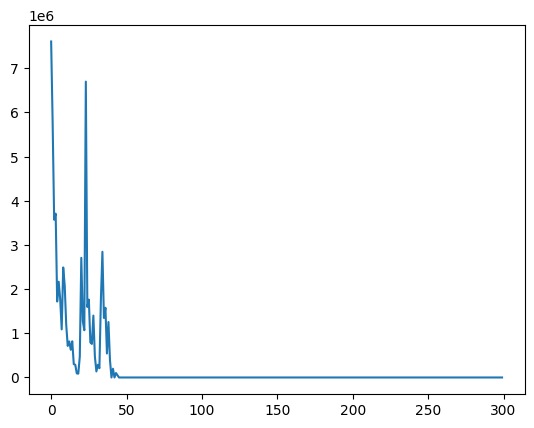

In [36]:
import seaborn as sns
sns.lineplot(x=history.epoch, y=history.history['loss'])

<Axes: >

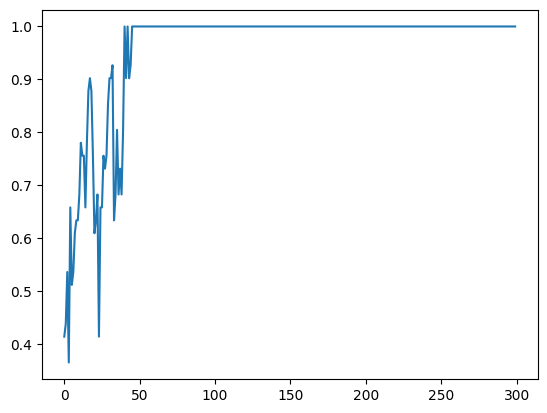

In [37]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'])

In [38]:
label_pred = model.predict(feat_data_test)
prediction = pd.DataFrame(label_pred)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,0
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


In [39]:
test_scores = model.evaluate(feat_data_test, feat_label_test)
print("Test Loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5455 - loss: 254834.1406
Test Loss: 254834.140625
Test accuracy: 0.5454545617103577


# CHAT GPT CODE

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(feat_data_train.shape[1],)),  # Feature extraction layer
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # Additional layer for further feature extraction
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    feat_data_train, feat_label_train,
    validation_split=0.2,
    epochs=50,
    batch_size=5,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(data_test, feat_label_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}")

# Generate predictions
y_pred = (model.predict(data_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(feat_label_test, y_pred))

print("\nClassification Report:")
print(classification_report(feat_label_test, y_pred, target_names=["control", "case"]))


Epoch 1/50


/Users/borja/anaconda3/envs/Kaggle/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6456 - auc: 0.6743 - loss: 61340792.0000 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 18538410.0000
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6305 - auc: 0.6295 - loss: 39909420.0000 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 23451720.0000
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4655 - auc: 0.4438 - loss: 30538900.0000 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 20362048.0000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5916 - auc: 0.5962 - loss: 35044248.0000 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 5652266.0000
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3495 - auc: 0.3833 - loss: 34387792.0000 - val_accuracy: 0.3333 - val_auc: 0.3750 - val_loss: 3627327.7500
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - auc: 0.6605 - loss: 7884403.0000 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 4675931

In [47]:
test_scores = model.evaluate(data_test, feat_label_test)
print("Test Loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4545 - auc: 0.6667 - loss: 0.9360
Test Loss: 0.9360226988792419
Test accuracy: 0.4545454680919647
